YES BANK STOCK CLOSING PRICE PREDICTION
---



##Problem Statement :

Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month.

##Objective:


The main objective is to predict the stock's closing price of the month.To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. 

The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.

##Importing the libraries

In [ ]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#method which is used to split the data to train and test set during model building
from sklearn.model_selection import train_test_split

#importing different models for  prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 


#importing matrix module evaluation for performance evaluation
from sklearn.metrics import *
import pandas.util.testing as tm

#import vif method to reduce multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data set and read the files
df = pd.read_csv('/content/drive/MyDrive/Yes Bank _Project/data_YesBank_StockPrices.csv')

In [ ]:
#Reading the data
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Shape of the data
df.shape

(185, 5)

In [ ]:
#Basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
bank_df = df.copy() #Creating a copy of our dataset so that changes don't reflect in the original dataset

##Checking the null and duplicate values

In [ ]:
bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(bank_df[bank_df.duplicated()])

0



*   There are no Null Values found.
*   There are no Duplicate Values found.



##Feature Description : 
**Date** :- Date denotes the date of investment(date contains month and year for a particular price) (Object)

**Open** :- Means the price at which a stock started trading (Numerical).

**High** :-The high is the highest price at which a stock traded during a period (Numerical).

**Low** :-The low is the minimum price at which a stock traded during a period (Numerical).

**Close** :- The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a dependent variable which we need to predict from our respetive ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

In [ ]:
#Statistical Summary
bank_df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


###Checking andd Rectifying the date format if needed

In [ ]:
bank_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

Ok so as we can see format of Date is in "MMMM-YY",So we need to convert into proper format

In [ ]:
#Converting the date format using datetime() 
bank_df['Date'] = pd.to_datetime(bank_df['Date'].apply (lambda x : datetime.strptime(x, '%b-%y')))
bank_df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

ML models like Linear Regression won't work on "Date" data, as we need to convert into numerical column. But, In our case numerical data would have no use to predict the goal. So, we'd rather make the "Date" Column as dataframe index.

In [ ]:
bank_df.set_index('Date',inplace=True)

In [ ]:
bank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


Only 4 Feature Columns are left, let's get started with Exploratory Data Analysis

#Exploratory Data Analysis

Text(0.5, 1.0, 'Close stock price distribution plot')

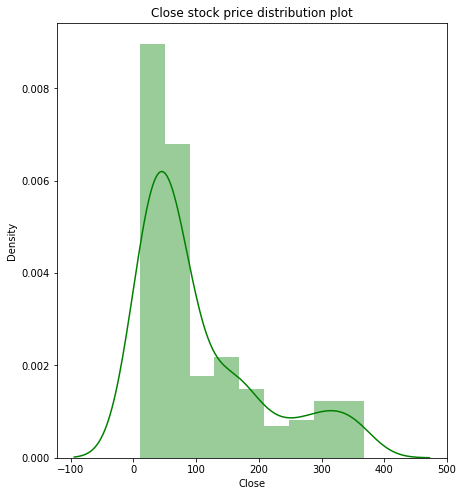

In [ ]:
#ploting the histogram to see "close" (dependent variable) 
plt.figure(figsize=(7,8))
sns.distplot(bank_df['Close'], color = "green")
plt.title("Close stock price distribution plot")

As we can see  It's a **Positively Skewed Distribution**, let's make it **Normal Distribution** using **Log transformation**

Text(0.5, 1.0, 'Distribution plot of Close Price after log transformation')

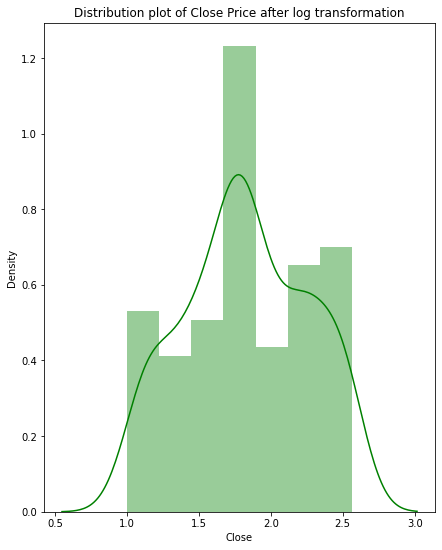

In [ ]:
#Log transformation of dependent variable "Close"
plt.figure(figsize=(7,9))
sns.distplot(np.log10(bank_df['Close']),color = 'green')
plt.title("Distribution plot of Close Price after log transformation")

Normally Distributed Graph

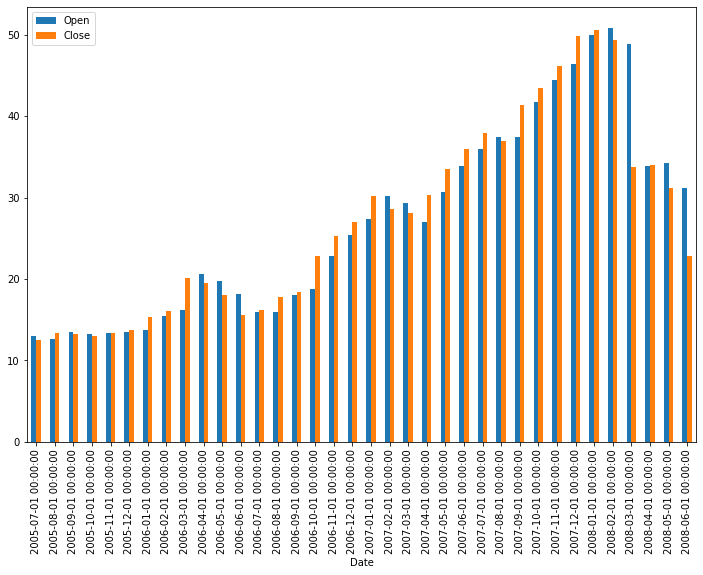

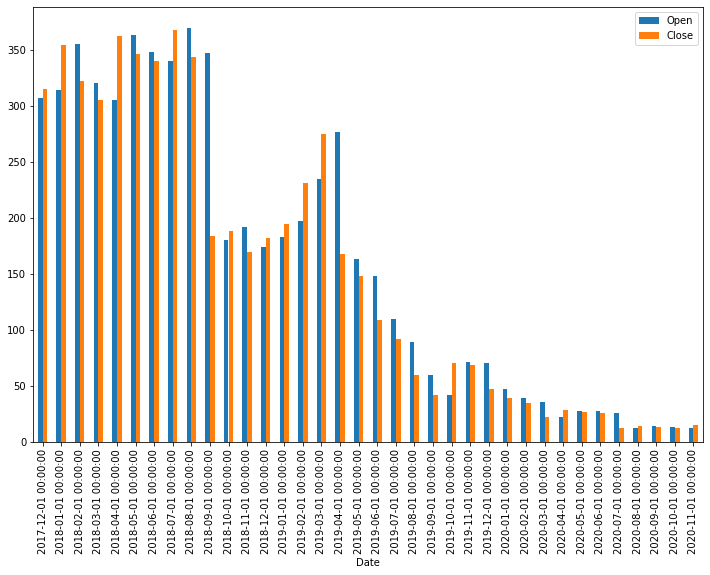

In [ ]:
#Plot Open vs Close price using bar graph
bank_df[['Open','Close']].head(36).plot(kind='bar',figsize=(12,8))
plt.show()
bank_df[['Open','Close']].tail(36).plot(kind='bar',figsize=(12,8)) # show only last three year record
plt.show()

###Numerical Features


In [ ]:
num_features = bank_df.describe().columns 
num_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

All the columns in the dataset are numerical in the dataset

#Outlier Detection 


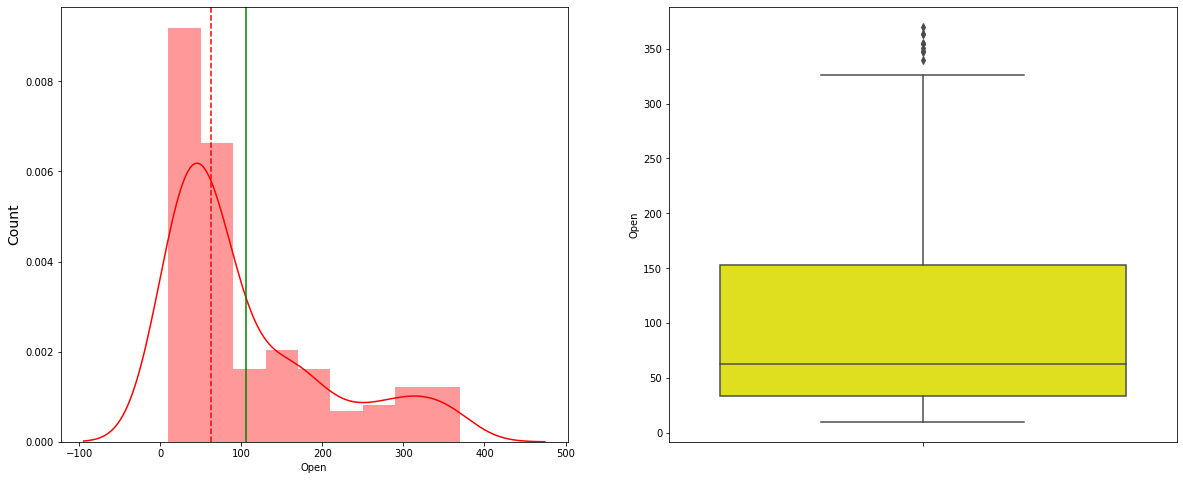

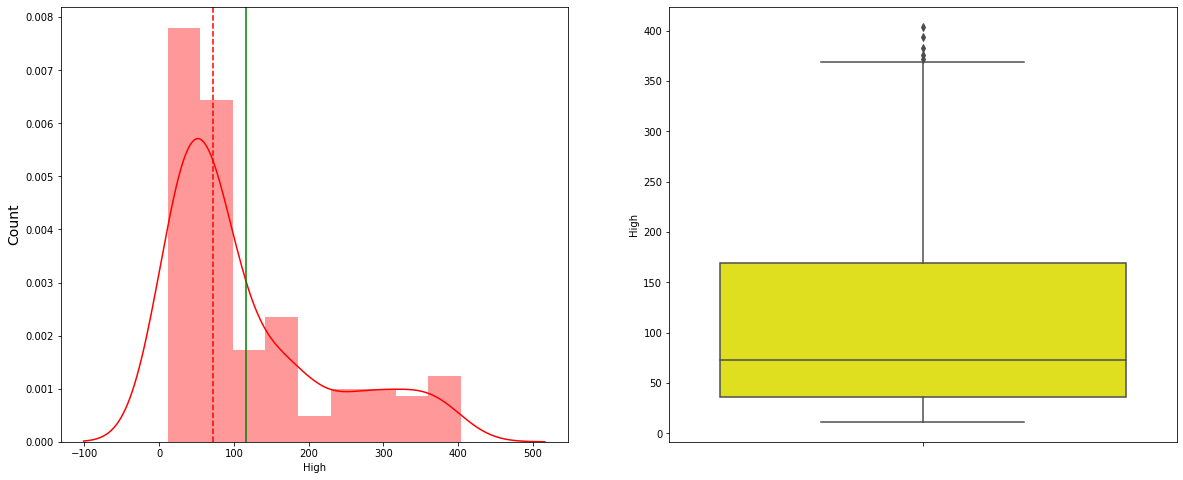

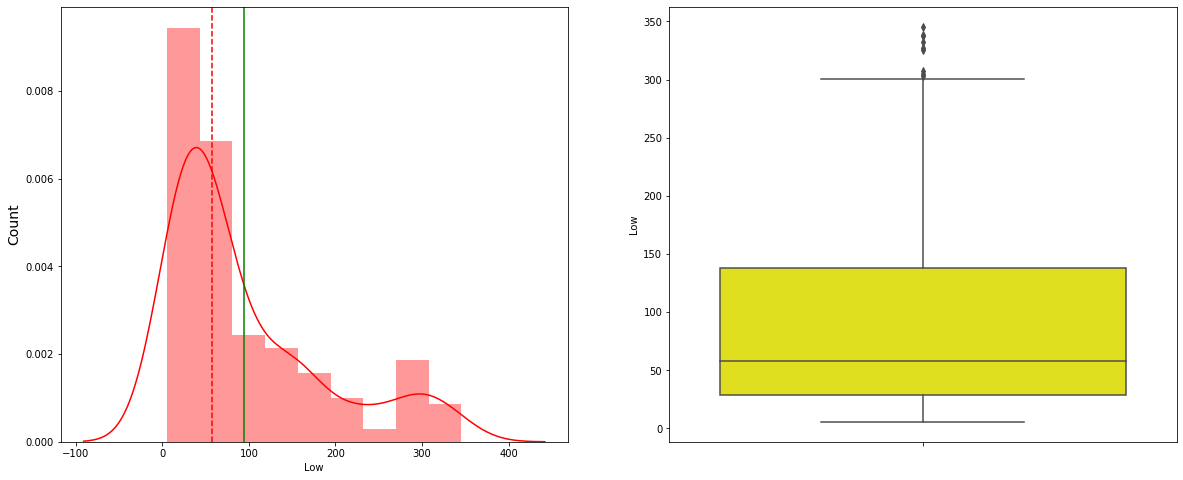

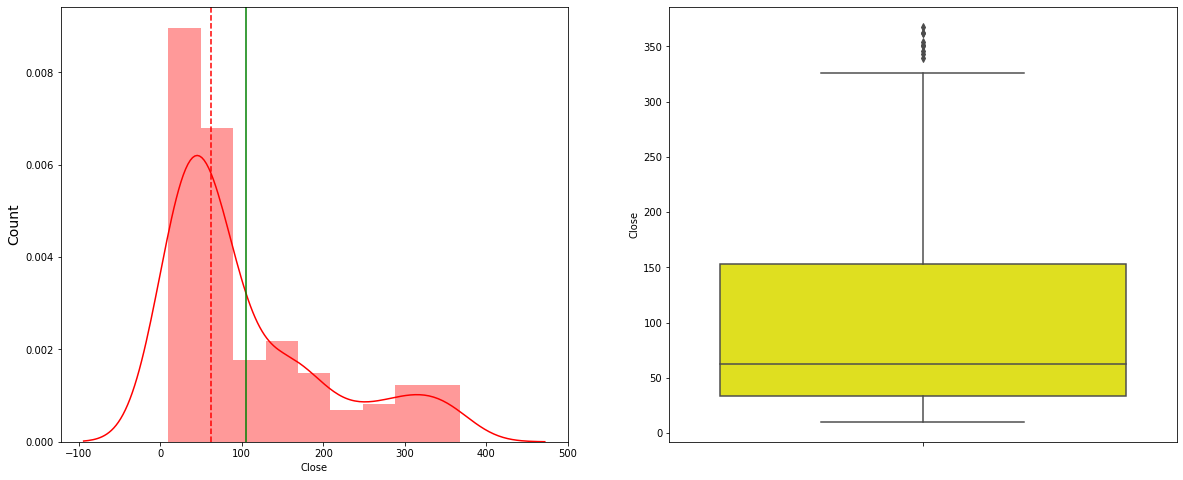

In [ ]:
#ploting a graph for each numerical feature
for col in num_features:
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  sns.distplot(bank_df[col],color='red')


  plt.ylabel("Count", size = 14)
  plt.axvline(df[col].mean(),color='green', linewidth=1.5)
  plt.axvline(df[col].median(),color = 'red', linestyle = "dashed", linewidth=1.5)

  plt.subplot(1,2,2)
  sns.boxplot(y=bank_df[col], color ='yellow')
plt.show()

* Above Graphs Signify that they aren't normally distributed, Mean and Median Should be equal for perfect normal distribution curve.
* So We need to convert all the features using log transformation to gain normal distribution
* Outliers are observed in all the feature columns, by using log transformation conversion to normal distribution will remove all the outliers from our dataset.

##Log tranformation 

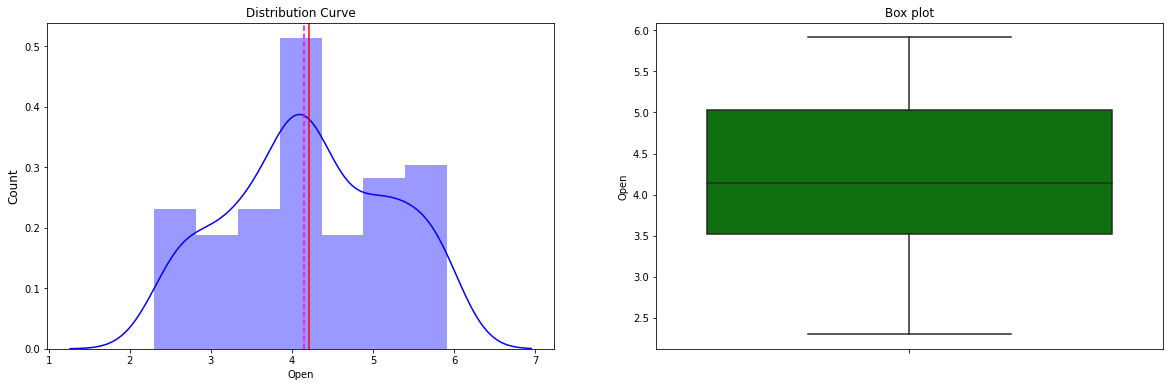

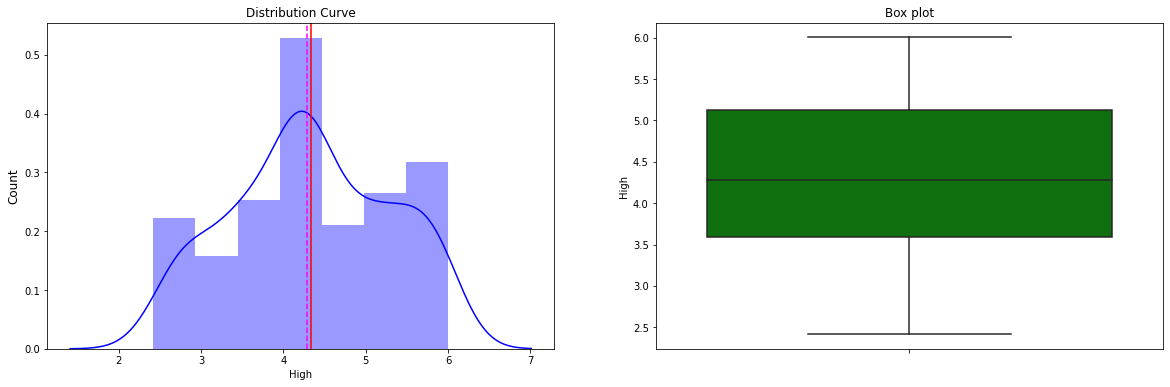

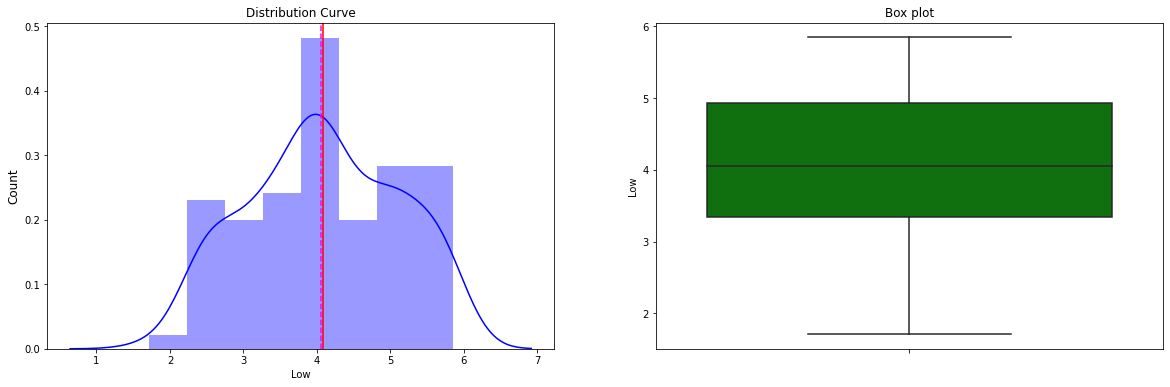

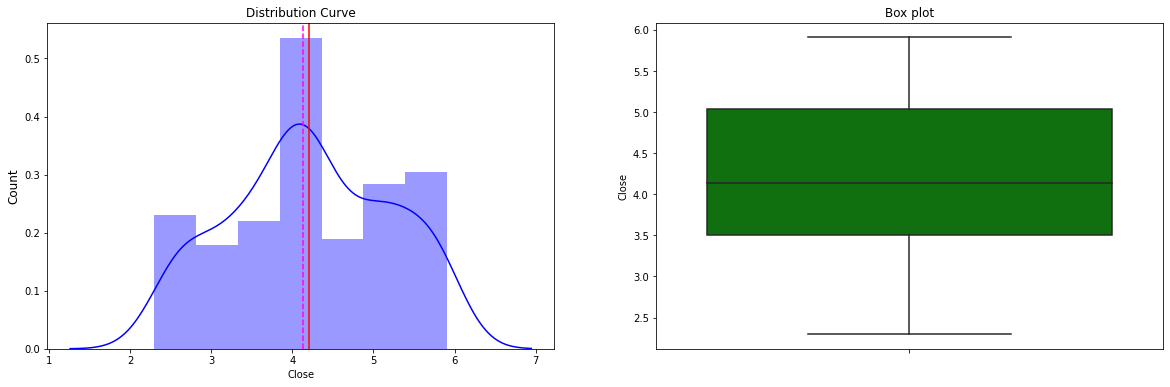

In [ ]:
# log tranformation to convert a column to normal distribution
for col in num_features:
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.title("Distribution Curve")

  log_transformation = np.log(bank_df[col])
  sns.distplot(log_transformation, color = "blue")

  plt.ylabel("Count", size = 12)
  plt.axvline(log_transformation.mean(),color="red",linewidth=1.5)
  plt.axvline(log_transformation.median(),color="magenta",linestyle="dashed",linewidth=1.5)

  plt.subplot(1,2,2)
  plt.title("Box plot")
  sns.boxplot(y=log_transformation,color="green")
plt.show()




* Above graphs shows that, our data is normally distributed, Mean is nearly equal to median also the  outliers have also been removed by log transformation.
* From the boxplot, We can also find the quartile (q1 , q2 , q3),
We got the approximate result:- 

* For Feature "Open" :
> -Lower Quartile (Q1) :- 3.6
   , Median (Q2) :- 4.3
  , Upper Quartile (Q3) :- 5.0

* For Feature "High" :-
> Lower Quartile (Q1) :- 3.6 , Median (Q2) :- 4.4, Upper Quartile (Q3) :- 5.1

* For Feature "Low" :-
> Lower Quartile (Q1) :- 3.3 ,
Median (Q2) :- 4.1 ,
Upper Quartile (Q3) :- 4.9

#Did Rana Kapoor's 2018 Fraud case affect the stock price?

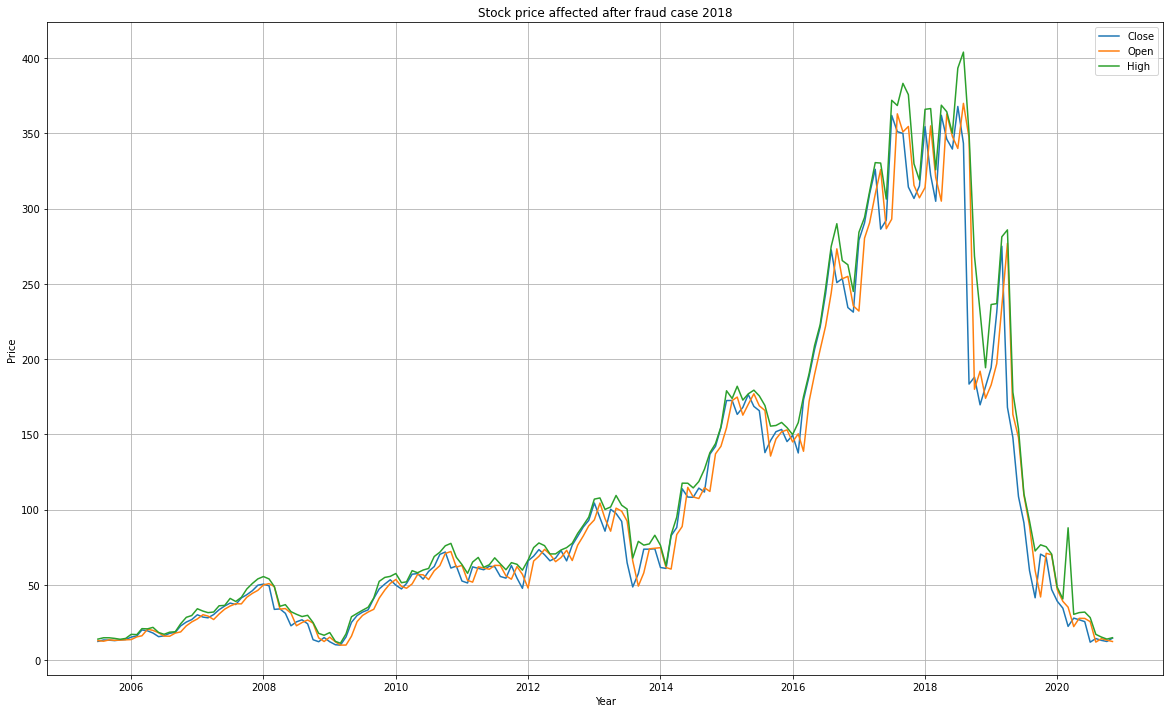

In [ ]:
# Plot the Line for each numerical column and see how stock price is affected after fraud case 2018

plt.figure(figsize=(20,12))
plt.plot(bank_df['Close'])
plt.plot(bank_df['Open'])
plt.plot(bank_df['High'])
plt.legend(['Close','Open','High'])
plt.title("Stock price affected after fraud case 2018")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

##Let's create dependent variable and independent variable


In [ ]:
#iloc method will be feasible to locate the last column which is our dependent variable
dependent_variable = bank_df.iloc[:,-1]


In [ ]:
#iloc method will be feasible to locate all the independent variable except the last column
independent_variable = bank_df.iloc[:,:-1]


In [ ]:
independent_variable.head(5)

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88


##Checking the coorelation between the variables


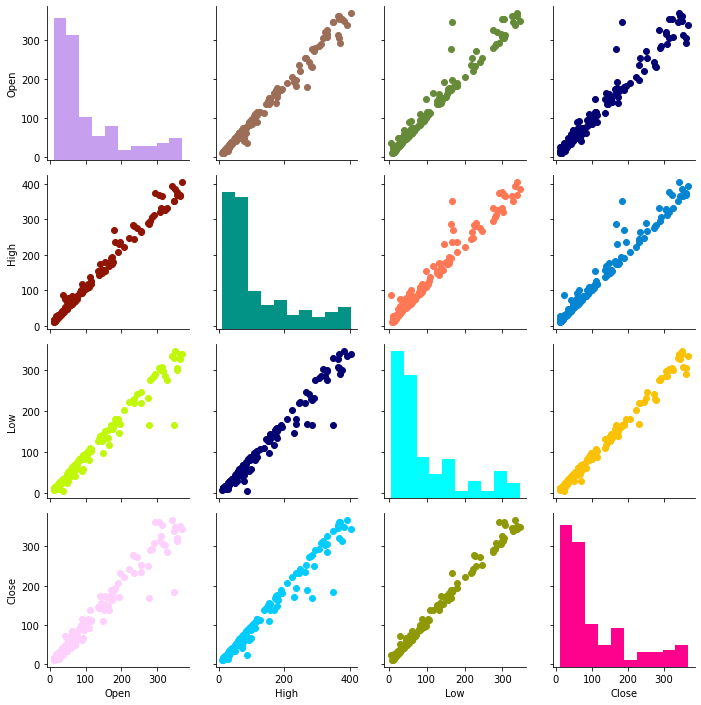

In [ ]:
# It plot each and every column of our df with other column

colors = iter(['xkcd:lavender', 'xkcd:teal', 'xkcd:cyan',
       'xkcd:hot pink', 'xkcd:brick red',
       'xkcd:chartreuse', 'xkcd:deep blue', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:cerulean', 'xkcd:goldenrod', 'xkcd:coral',
       'xkcd:pastel blue', 'xkcd: pine green', 'xkcd:pistachio'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(bank_df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

The above pair plot shows high correlation among variables.

##Checking the relationship betweent the variables

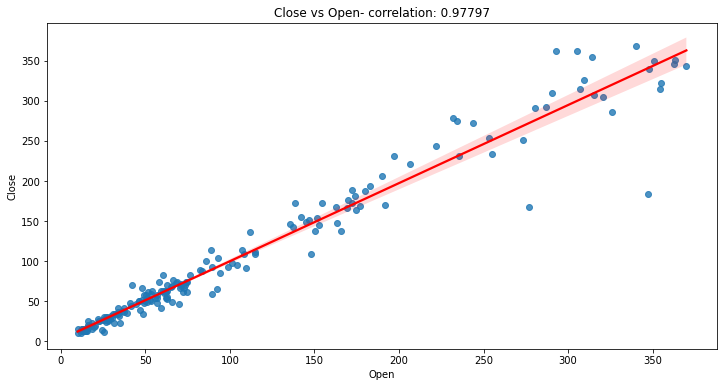

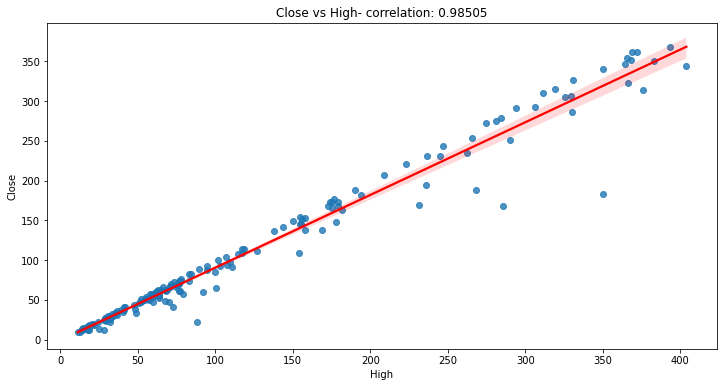

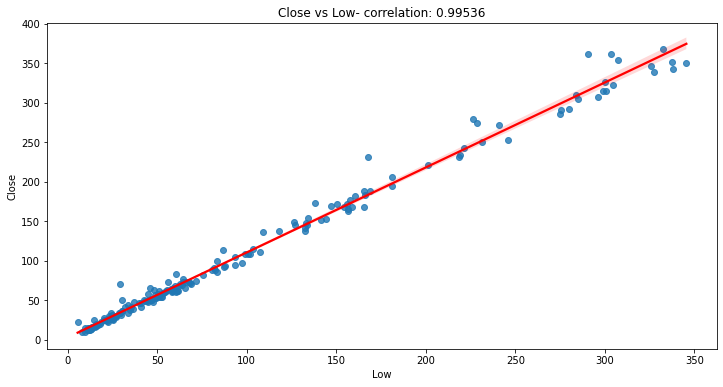

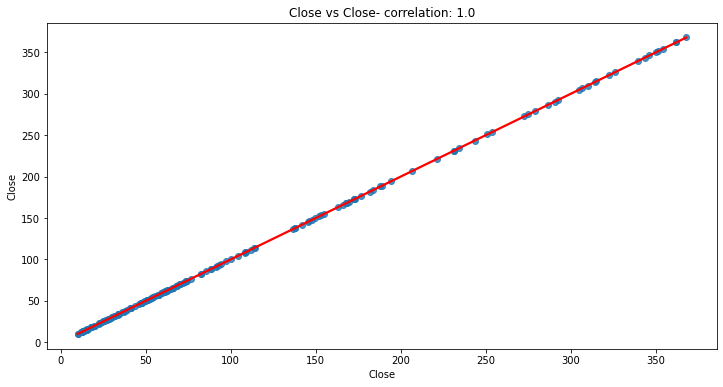

In [ ]:
# scatter plot to see the relationship between dependent & independent variables
for col in num_features:
  fig=plt.figure(figsize=(12,6))
  ax=fig.gca()
  feature=bank_df[col]  # store column in variable
  label=bank_df['Close'] # it store independent variable
  correlation= round(feature.corr(label),5)  # finding correlation and round it upto 5 decimal places
  sns.regplot(x=bank_df[col],y=bank_df["Close"],line_kws={"color": "red"})   # plot data
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))  # print correlation value with title on graph plotted below

* The above graphs depicts that there is high correlation between dependent variable (Close) and independent variable (High,Low,Open).

##Multicollinearity Check


In [ ]:
#Multicollinearity Check is conducted via calculating VIF(Variation Inflation Factor)
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

  return(vif) 

In [ ]:
cal_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
* As all the variables are equally important for closing stock price prediction, So we will not be performing any kind of feature engineering here.
* Removing column lead to loss of valuable information(features) which are essential for accurate prediction for the model.It results in bad model.So,We are not deleting any featues form the dataset and try to predict the result and see how the model performs with multicollinearity and evaluate the performance of the model.

##Model Implementation


In [ ]:
#applying  z score to each value of independent var
from scipy.stats import zscore
X = round(independent_variable.apply(zscore), 3)

In [ ]:
#apply log to the dependent var
Y = np.log10(dependent_variable)

##Splitting the dataset
* Dividing the dataset into 2 subsets, First subset will be used as our **training** dataset and the second subset will be used as our **test** dataset.

> **Train Dataset** : Used to fit the machine learning model.            
> **Test Dataset** : Used to evaluate the fit machine learning model.

In [ ]:
bank_df.shape

(185, 4)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (148, 3)
X_test: (37, 3)


In [ ]:
#Data Frames of test and train dataset
train_df = pd.DataFrame(X_train,Y_train)
test_df = pd.DataFrame(Y_test)
test_df.rename(columns= {'Close': "Actual Closing Price"}, inplace = True)

In [ ]:
#Creating an Empty for Evaluation metrics
i = 0
evaluation_metric_df = pd.DataFrame()

##Function to create an Evaluation metrics

In [ ]:
# This function is used to evaluate all the metrices for different algorithms used for models.
# It contain metrices like Mean Square Error , Root Mean Square Error , R^2 , Adjusted R^2 
def evaluation_metrics(Y_pred ):
  MSE = mean_squared_error(Y_test,Y_pred)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(Y_test,Y_pred)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(Y_test,Y_pred))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  MAPE = mean_absolute_percentage_error(Y_test,Y_pred)
  print("Mean Absolute Percentage Error: ",round(MAPE,4)," %" ) 
  # accuracy_score = score
  # print("Accuracy score: ",accuracy_score)

  """  This function is also inserting evaluation metrices of each applied model in 
       empty dataframe create above named as "evaluation_metric_df"  
  """

  evaluation_metric_df.loc[i,"MSE"] = round(MSE,4)
  evaluation_metric_df.loc[i,"RMSE"] = round(RMSE,4)
  evaluation_metric_df.loc[i,"R2"] = round(r2,4)
  evaluation_metric_df.loc[i,"Adjusted R2"]=round(adjusted_r2,4)
  evaluation_metric_df.loc[i,"MAPE"]=round(MAPE,4)

  return

In [ ]:
# Function to plot graph between actual and predicted value of  dependent variable(Close)

def plot_graph(Y_predicted):
   
   """ Plot scatter plot between actual close price vs predicted close price """

   plt.figure(figsize=(20,12))
   plt.plot((Y_predicted) )              # plot predicted values
   plt.plot(np.array(Y_test))             # plot test values 
   plt.legend(["Predicted","Actual"])
   plt.ylabel("Price")
   plt.title("Actual Stock Close Price VS Predicted Stock Close Price")
   plt.xlabel("No. of test data")
   plt.show()
   return

#1. Linear Regression

In [ ]:
#Linear Regression Implementation
linear_reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
#Accuracy Score
linear_score = linear_reg.score(X_train, Y_train)

In [ ]:
linear_score


0.8091152094340809

Linear Regression Coeff

In [ ]:
linear_reg.coef_

array([-0.13270791,  0.29061643,  0.23265022])

In [ ]:
len(linear_reg.coef_)

3

In [ ]:
# Intercept term

linear_reg.intercept_

1.8262495893435555

In [ ]:
# Predicting the values of Y(dependent variable) on the basis of test data
Y_pred_linear = linear_reg.predict(X_test)
Y_pred_linear

array([1.53276423, 1.96672923, 1.61039984, 1.95577646, 1.66713574,
       1.53291803, 2.3198133 , 1.47234925, 1.46174706, 2.27202742,
       2.59746859, 1.77196223, 2.0045669 , 1.63999469, 2.73573264,
       2.44754382, 1.69457789, 1.51594662, 2.45298264, 1.61176382,
       1.44547559, 1.87456785, 2.0156832 , 1.63781436, 2.25493358,
       1.63516541, 2.42563442, 1.46032674, 1.83171021, 1.62287589,
       2.8811247 , 2.77612524, 1.69605907, 2.0717636 , 1.56161009,
       1.59665024, 2.42253306])

In [ ]:
# Adding one column in test dataframe to see the difference between actual and predicted values
test_df['LR Predicted Closing Price'] = Y_pred_linear
linear_df = test_df.loc[:,['Actual Closing Price','LR Predicted Closing Price']]
linear_df.head(5)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,1.532245,1.532764
2015-12-01,2.162056,1.966729
2019-12-01,1.671636,1.610400
2014-11-01,2.152533,1.955776
2010-08-01,1.793930,1.667136


In [ ]:
evaluation_metric_df.loc[i,"Model_Name"] = 'Linear regression'

evaluation_metrics(Y_pred_linear)
i+=1

Mean Squared Error:  0.031980526670162296
Root Mean Squared Error:  0.17883100030521076
R2:  0.8283222778327901
Adjusted R2:  0.8127152121812256
Mean Absolute Percentage Error:  0.087  %
